In [1]:
import pandas as pd
import numpy as np
import warnings
import time
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('US_Accidents_June20.csv')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,A-3513776,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,...,False,False,False,False,False,False,Day,Day,Day,Day
3513613,A-3513777,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,...,False,False,False,False,False,False,Day,Day,Day,Day
3513614,A-3513778,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,...,False,False,False,False,False,False,Day,Day,Day,Day
3513615,A-3513779,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
df.shape

(3513617, 49)

In [6]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [8]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.478818e+06,3.513617e+06,3.513617e+06,3.513617e+06,1.034799e+06,1.034799e+06,3.513617e+06,1.250753e+06,3.447885e+06,1.645368e+06,3.443930e+06,3.457735e+06,3.437761e+06,3.059008e+06,1.487743e+06
mean,2.080226e+02,2.339929e+00,3.654195e+01,-9.579151e+01,3.755758e+01,-1.004560e+02,2.816167e-01,5.975383e+03,6.193512e+01,5.355730e+01,6.511427e+01,2.974463e+01,9.122644e+00,8.219025e+00,1.598256e-02
std,2.076627e+01,5.521935e-01,4.883520e+00,1.736877e+01,4.861215e+00,1.852879e+01,1.550134e+00,1.496624e+04,1.862106e+01,2.377334e+01,2.275558e+01,8.319758e-01,2.885879e+00,5.262847e+00,1.928262e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.363784e+01,-1.174418e+02,3.399477e+01,-1.183440e+02,0.000000e+00,8.640000e+02,5.000000e+01,3.570000e+01,4.800000e+01,2.973000e+01,1.000000e+01,5.000000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.591687e+01,-9.102601e+01,3.779736e+01,-9.703438e+01,0.000000e+00,2.798000e+03,6.400000e+01,5.700000e+01,6.700000e+01,2.995000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.032217e+01,-8.093299e+01,4.105139e+01,-8.210168e+01,1.000000e-02,7.098000e+03,7.590000e+01,7.200000e+01,8.400000e+01,3.009000e+01,1.000000e+01,1.150000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,1.706000e+02,1.150000e+02,1.000000e+02,5.774000e+01,1.400000e+02,9.840000e+02,2.500000e+01


In [9]:
df.dtypes

ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitat

In [10]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [11]:
df.isna().sum()

ID                             0
Source                         0
TMC                      1034799
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2478818
End_Lng                  2478818
Distance(mi)                   0
Description                    1
Number                   2262864
Street                         0
Side                           0
City                         112
County                         0
State                          0
Zipcode                     1069
Country                        0
Timezone                    3880
Airport_Code                6758
Weather_Timestamp          43323
Temperature(F)             65732
Wind_Chill(F)            1868249
Humidity(%)                69687
Pressure(in)               55882
Visibility(mi)             75856
Wind_Direction             58874
Wind_Speed(mph)           454609
Precipitat

In [12]:
print("Categorical features: Uniqueness\n")
for col in df.columns:
    print(col,df[col].unique().size)

Categorical features: Uniqueness

ID 3513617
Source 3
TMC 22
Severity 4
Start_Time 3200042
End_Time 3246120
Start_Lat 1124695
Start_Lng 1113407
End_Lat 375075
End_Lng 383570
Distance(mi) 13476
Description 1780093
Number 40366
Street 176262
Side 3
City 11896
County 1724
State 49
Zipcode 418781
Country 1
Timezone 5
Airport_Code 2002
Weather_Timestamp 546087
Temperature(F) 832
Wind_Chill(F) 975
Humidity(%) 101
Pressure(in) 1023
Visibility(mi) 86
Wind_Direction 25
Wind_Speed(mph) 161
Precipitation(in) 262
Weather_Condition 128
Amenity 2
Bump 2
Crossing 2
Give_Way 2
Junction 2
No_Exit 2
Railway 2
Roundabout 2
Station 2
Stop 2
Traffic_Calming 2
Traffic_Signal 2
Turning_Loop 1
Sunrise_Sunset 3
Civil_Twilight 3
Nautical_Twilight 3
Astronomical_Twilight 3


In [13]:
# Dropping purely categorical features
df = df.drop(columns=['Country','Turning_Loop'], axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Timezone               object 
 20  Airport_Code           object 
 21  Weather_Timestamp      object 
 22  Temperature(F)    

In [15]:
#Dropping features unnecessary for prediction
df = df.drop(columns=['ID','Source','TMC','End_Time','End_Lat','End_Lng',
                                    'Distance(mi)','Description','Number', 'Timezone', 'Weather_Timestamp'], axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 36 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Severity               int64  
 1   Start_Time             object 
 2   Start_Lat              float64
 3   Start_Lng              float64
 4   Street                 object 
 5   Side                   object 
 6   City                   object 
 7   County                 object 
 8   State                  object 
 9   Zipcode                object 
 10  Airport_Code           object 
 11  Temperature(F)         float64
 12  Wind_Chill(F)          float64
 13  Humidity(%)            float64
 14  Pressure(in)           float64
 15  Visibility(mi)         float64
 16  Wind_Direction         object 
 17  Wind_Speed(mph)        float64
 18  Precipitation(in)      float64
 19  Weather_Condition      object 
 20  Amenity                bool   
 21  Bump                   bool   
 22  Crossing          

In [17]:
null_features = {"feature": [], "missing_values_%": []}
for col in df.columns:
    null_features["feature"].append(col)
    null_features["missing_values_%"].append(
        100 * (df[col].isna().sum() / len(df[col])))

nf_df = pd.DataFrame(null_features)
nf_df.sort_values(["missing_values_%"], inplace=True, ascending=False)

print(nf_df)

                  feature  missing_values_%
18      Precipitation(in)         57.657793
12          Wind_Chill(F)         53.171675
17        Wind_Speed(mph)         12.938490
19      Weather_Condition          2.166941
15         Visibility(mi)          2.158915
13            Humidity(%)          1.983341
11         Temperature(F)          1.870779
16         Wind_Direction          1.675595
14           Pressure(in)          1.590441
10           Airport_Code          0.192337
9                 Zipcode          0.030424
34      Nautical_Twilight          0.003273
33         Civil_Twilight          0.003273
32         Sunrise_Sunset          0.003273
35  Astronomical_Twilight          0.003273
6                    City          0.003188
8                   State          0.000000
26                Railway          0.000000
2               Start_Lat          0.000000
3               Start_Lng          0.000000
4                  Street          0.000000
31         Traffic_Signal       

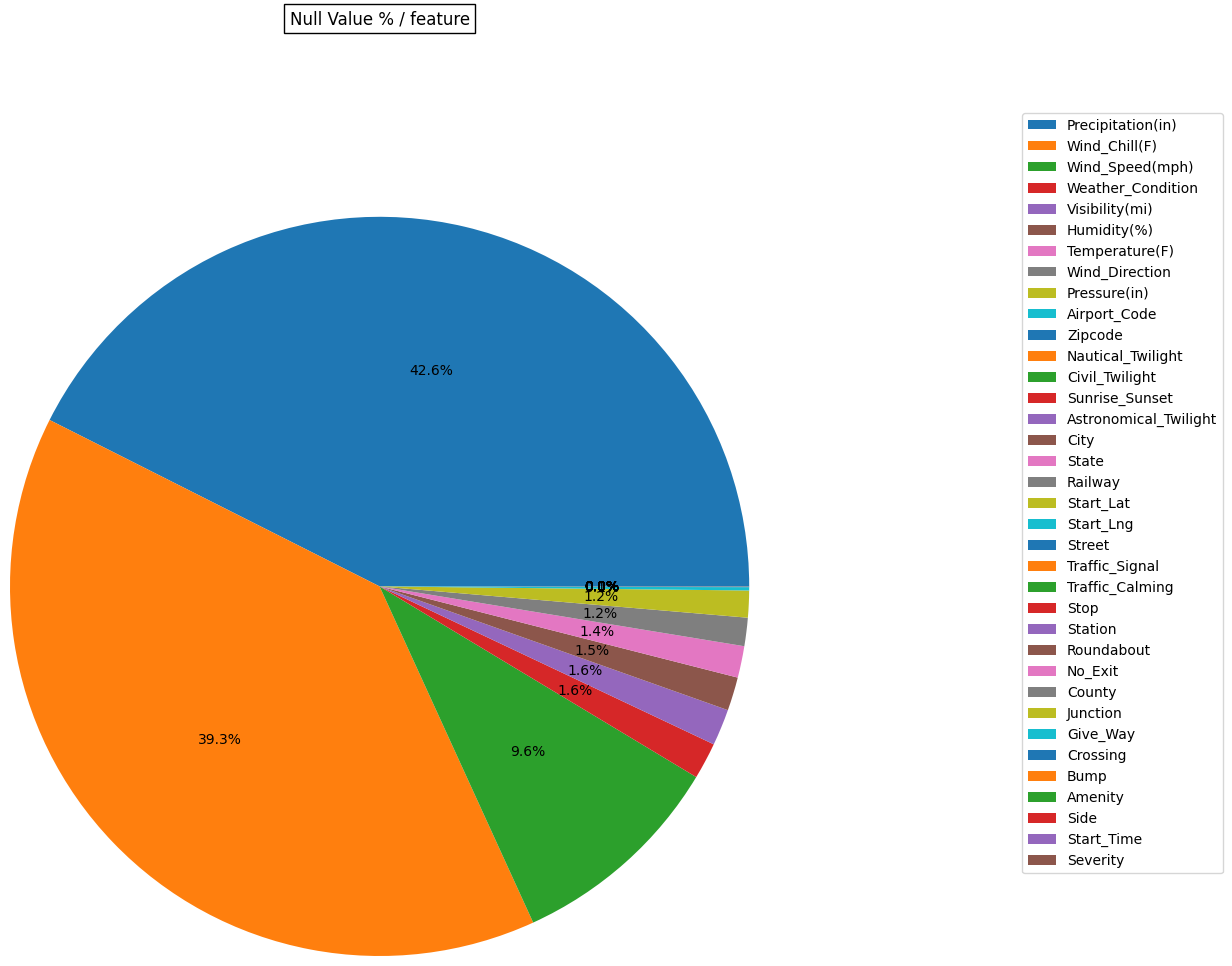

In [18]:
plt.title("Null Value % / feature",
          bbox={'facecolor': '1',},
          y=2)

pieChart = plt.pie(nf_df['missing_values_%'],
                   radius=2.5,
                   autopct='%1.1f%%')

plt.legend(labels=nf_df['feature'], bbox_to_anchor=(2.8, 1.8))

<AxesSubplot:xlabel='feature'>

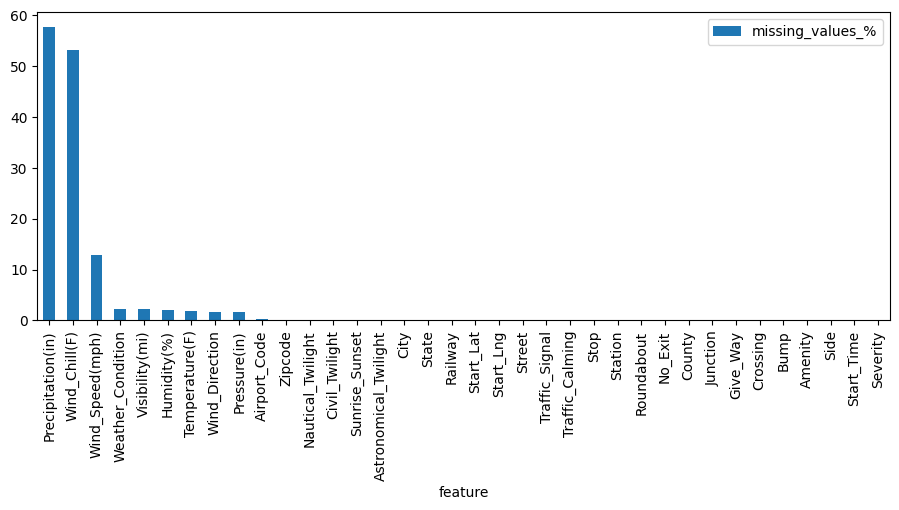

In [19]:
nf_df.plot(x="feature", y="missing_values_%", kind="bar", figsize=(11,4))

In [20]:
# Dropping columns with null values more than 50%
df = df.drop(columns=['Wind_Chill(F)', 'Precipitation(in)'], axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 34 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Severity               int64  
 1   Start_Time             object 
 2   Start_Lat              float64
 3   Start_Lng              float64
 4   Street                 object 
 5   Side                   object 
 6   City                   object 
 7   County                 object 
 8   State                  object 
 9   Zipcode                object 
 10  Airport_Code           object 
 11  Temperature(F)         float64
 12  Humidity(%)            float64
 13  Pressure(in)           float64
 14  Visibility(mi)         float64
 15  Wind_Direction         object 
 16  Wind_Speed(mph)        float64
 17  Weather_Condition      object 
 18  Amenity                bool   
 19  Bump                   bool   
 20  Crossing               bool   
 21  Give_Way               bool   
 22  Junction          

In [22]:
df.shape

(3513617, 34)

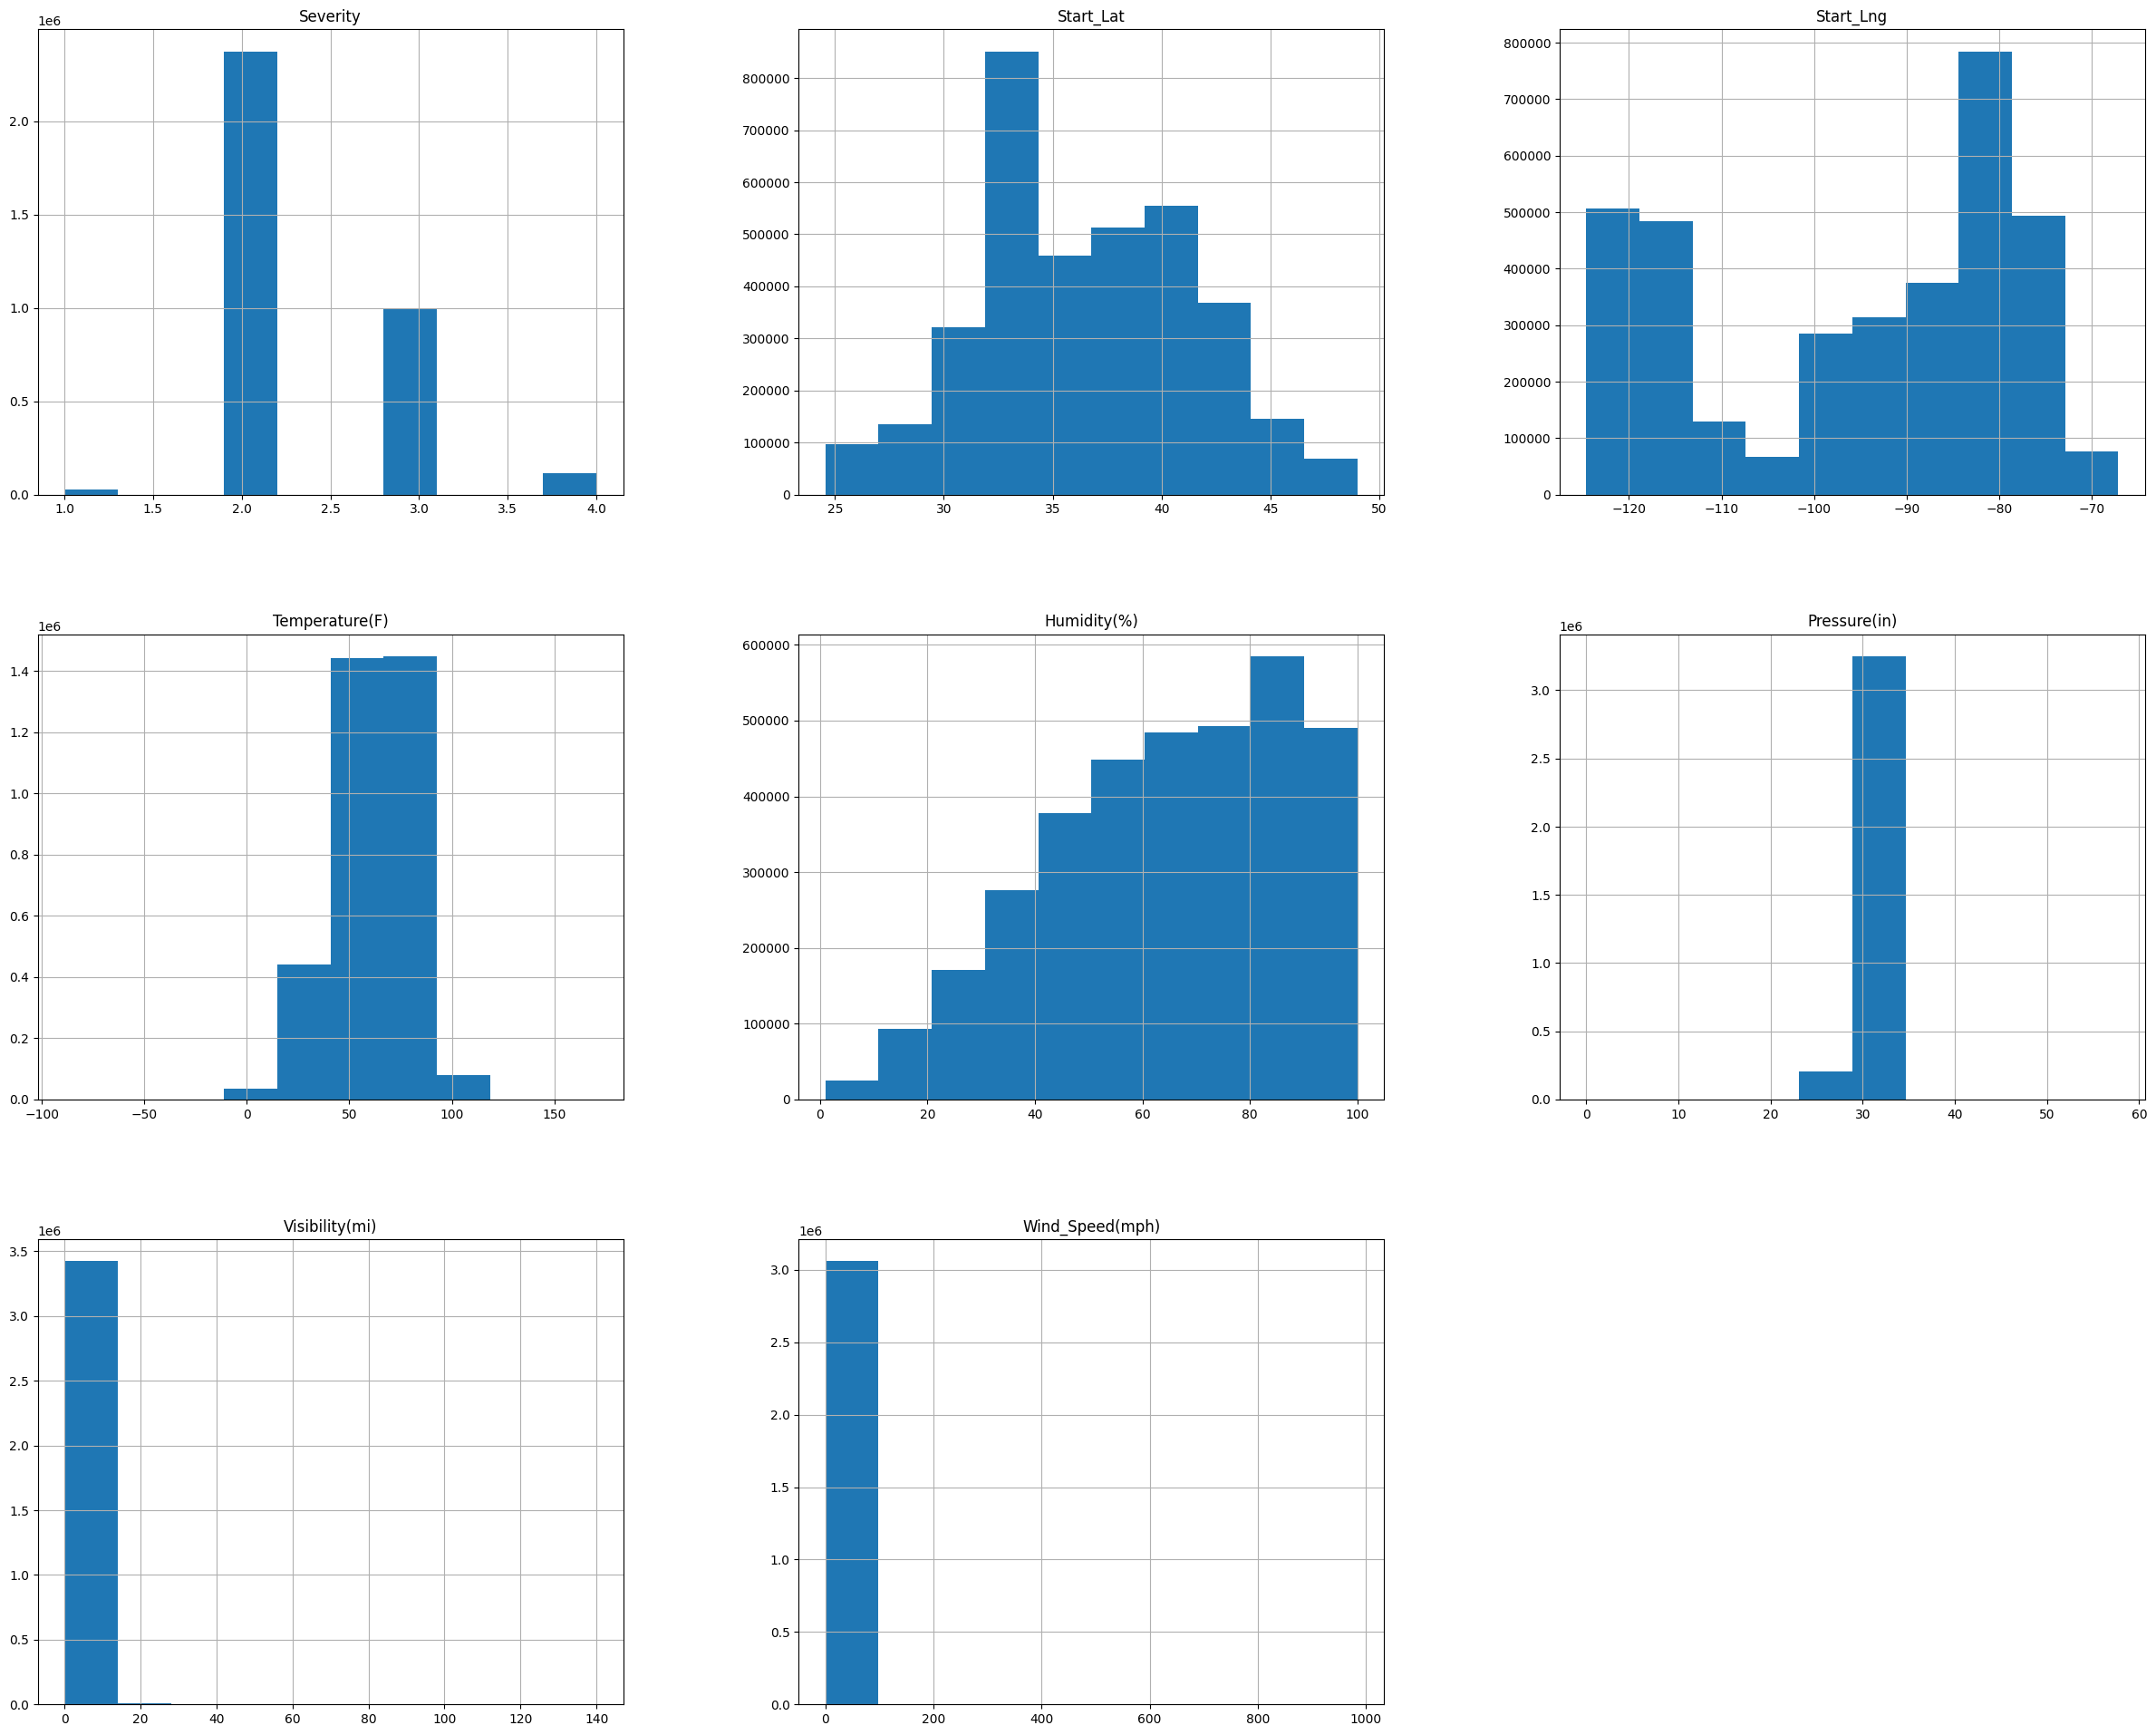

In [23]:
df.hist(figsize=(30, 24))
plt.show()

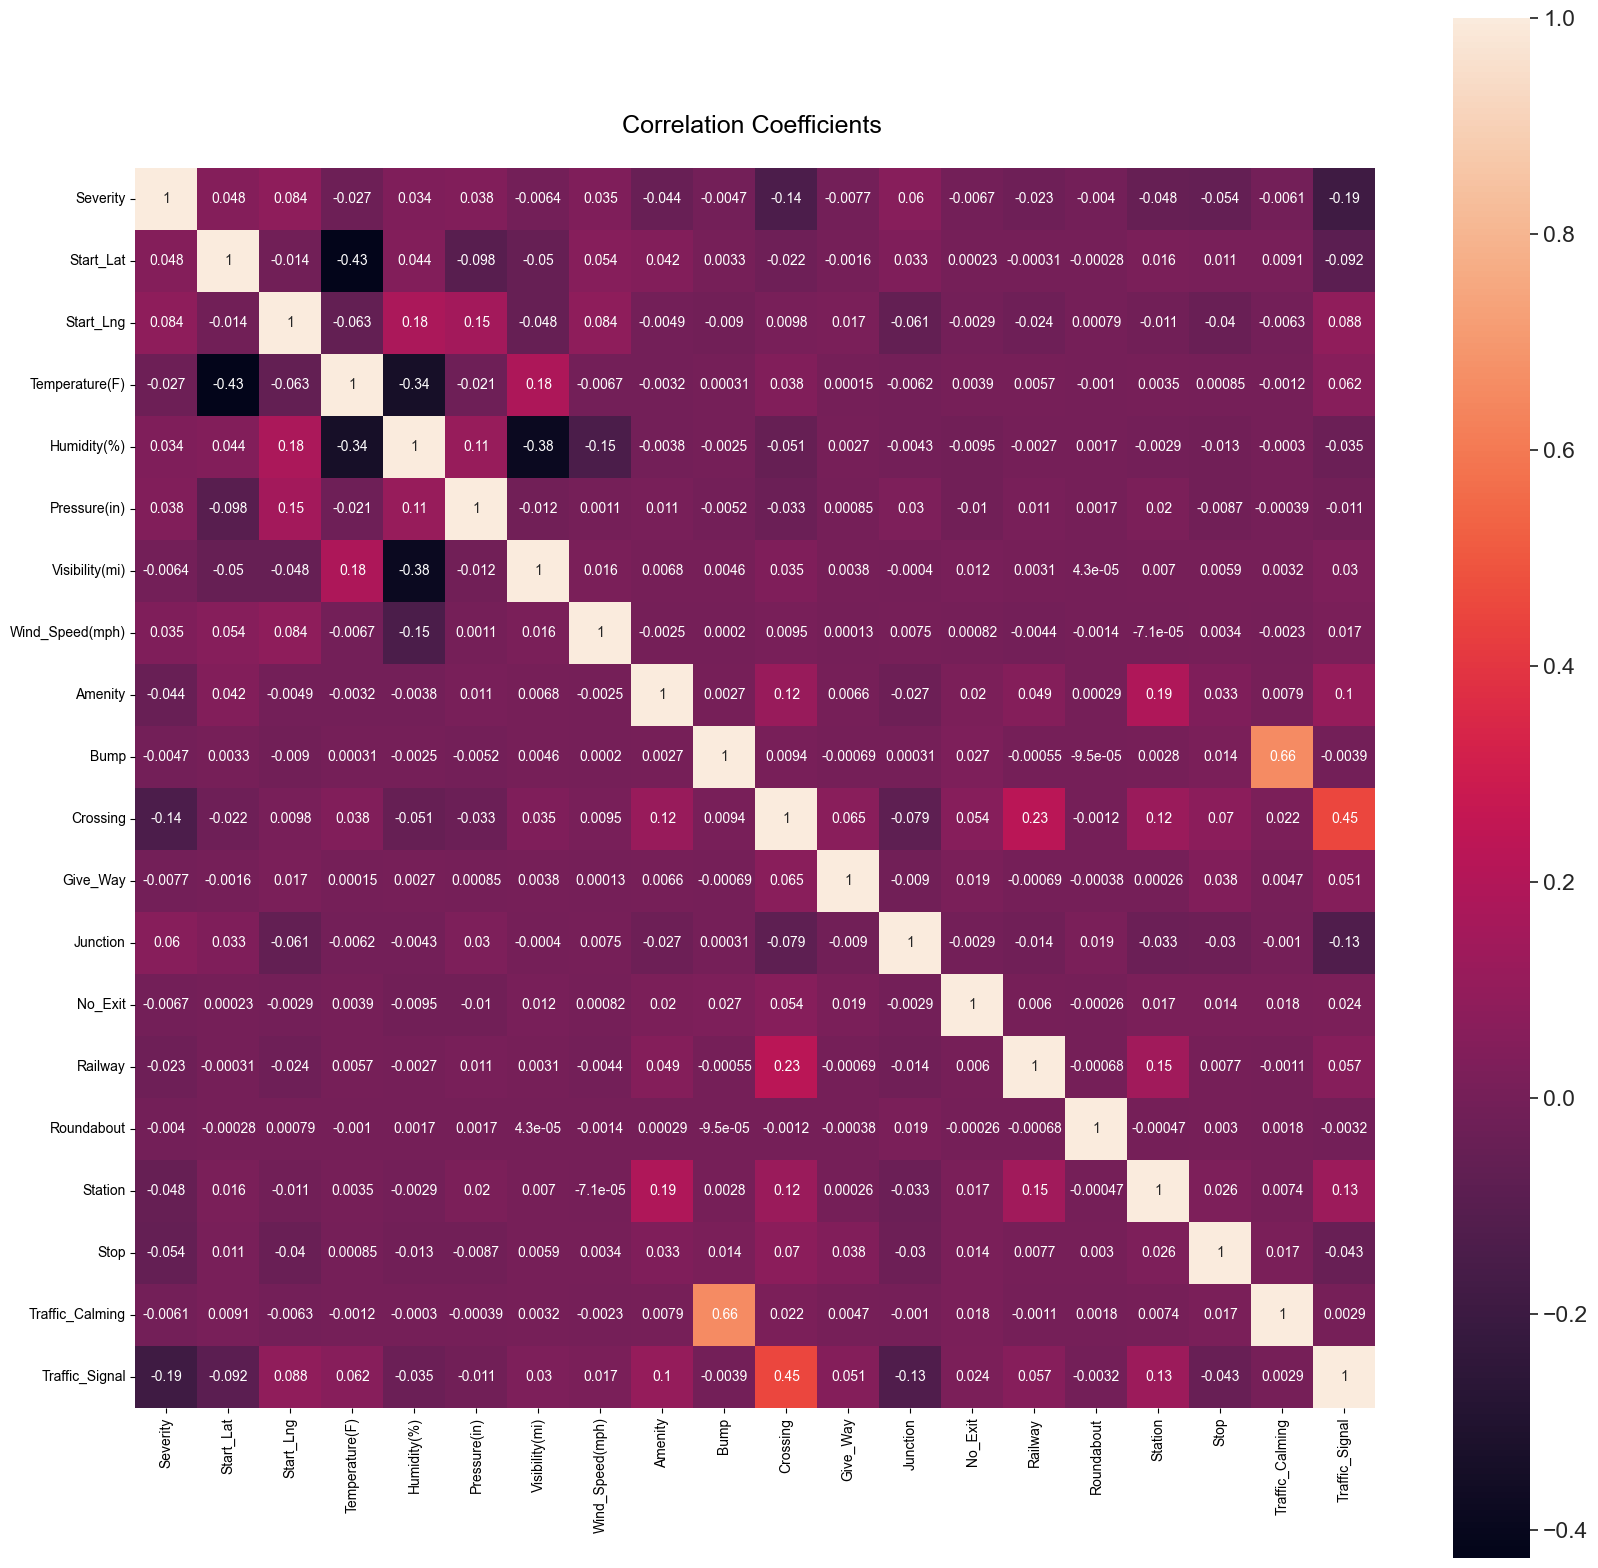

In [24]:
fig = plt.subplots (figsize = (20,20))
sns.set (font_scale = 1.5)
sns.heatmap (df.corr(), square = True, cbar = True, annot = True, annot_kws = {'size': 10})
plt.title('Correlation Coefficients \n')
plt.show ()

In [25]:
# Target feature is "Severity". We are checking for weakest relation to target and dropping them
df.corr()
df[df.columns[:]].corr()['Severity'][:].sort_values(ascending=False)

Severity           1.000000
Start_Lng          0.083705
Junction           0.060086
Start_Lat          0.047617
Pressure(in)       0.038380
Wind_Speed(mph)    0.034959
Humidity(%)        0.034319
Roundabout        -0.003956
Bump              -0.004671
Traffic_Calming   -0.006073
Visibility(mi)    -0.006433
No_Exit           -0.006705
Give_Way          -0.007747
Railway           -0.023492
Temperature(F)    -0.027275
Amenity           -0.044494
Station           -0.048260
Stop              -0.053500
Crossing          -0.138368
Traffic_Signal    -0.191531
Name: Severity, dtype: float64

In [26]:
# The weakest related features are Roundabout, Bump ,Traffic_Calming, Visibility(mi), No_Exit, Give_Way
df = df.drop(columns=['Roundabout', 'Bump' ,'Traffic_Calming', 'Visibility(mi)', 'No_Exit', 'Give_Way'], axis=1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 28 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Severity               int64  
 1   Start_Time             object 
 2   Start_Lat              float64
 3   Start_Lng              float64
 4   Street                 object 
 5   Side                   object 
 6   City                   object 
 7   County                 object 
 8   State                  object 
 9   Zipcode                object 
 10  Airport_Code           object 
 11  Temperature(F)         float64
 12  Humidity(%)            float64
 13  Pressure(in)           float64
 14  Wind_Direction         object 
 15  Wind_Speed(mph)        float64
 16  Weather_Condition      object 
 17  Amenity                bool   
 18  Crossing               bool   
 19  Junction               bool   
 20  Railway                bool   
 21  Station                bool   
 22  Stop              

In [28]:
df.isnull().sum()

Severity                      0
Start_Time                    0
Start_Lat                     0
Start_Lng                     0
Street                        0
Side                          0
City                        112
County                        0
State                         0
Zipcode                    1069
Airport_Code               6758
Temperature(F)            65732
Humidity(%)               69687
Pressure(in)              55882
Wind_Direction            58874
Wind_Speed(mph)          454609
Weather_Condition         76138
Amenity                       0
Crossing                      0
Junction                      0
Railway                       0
Station                       0
Stop                          0
Traffic_Signal                0
Sunrise_Sunset              115
Civil_Twilight              115
Nautical_Twilight           115
Astronomical_Twilight       115
dtype: int64

In [29]:
df = df.dropna()

In [30]:
df.isnull().sum()

Severity                 0
Start_Time               0
Start_Lat                0
Start_Lng                0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Airport_Code             0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Crossing                 0
Junction                 0
Railway                  0
Station                  0
Stop                     0
Traffic_Signal           0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
dtype: int64

In [31]:
cols_to_encode = ['Start_Time','Street','Side','City','County','State','Zipcode','Airport_Code','Wind_Direction',
                   'Weather_Condition','Amenity','Crossing','Junction','Railway','Station','Stop','Traffic_Signal',
                   'Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']

labelencoder = preprocessing.LabelEncoder()

for col in cols_to_encode:
    df[col] = labelencoder.fit_transform(df[col])
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3033519 entries, 2 to 3513616
Data columns (total 28 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Severity               int64  
 1   Start_Time             int64  
 2   Start_Lat              float64
 3   Start_Lng              float64
 4   Street                 int64  
 5   Side                   int64  
 6   City                   int64  
 7   County                 int64  
 8   State                  int64  
 9   Zipcode                int64  
 10  Airport_Code           int64  
 11  Temperature(F)         float64
 12  Humidity(%)            float64
 13  Pressure(in)           float64
 14  Wind_Direction         int64  
 15  Wind_Speed(mph)        float64
 16  Weather_Condition      int64  
 17  Amenity                int64  
 18  Crossing               int64  
 19  Junction               int64  
 20  Railway                int64  
 21  Station                int64  
 22  Stop              

In [32]:
df_copy = df.copy()
Y = df.pop('Severity')
X = df

In [33]:
X.head()

,Start_Time,Start_Lat,Start_Lng,Street,Side,City,County,State,Zipcode,Airport_Code,...,Crossing,Junction,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2,1,39.063148,-84.032608,142374,2,11215,318,33,194012,943,...,0,0,0,0,0,1,1,1,0,0
3,2,39.747753,-84.205582,85094,2,2472,1039,33,197841,498,...,0,0,0,0,0,0,1,0,0,0
4,3,39.627781,-84.188354,99443,2,2472,1039,33,198884,1208,...,0,0,0,0,0,1,0,0,0,0
5,4,40.100590,-82.925194,159616,2,11079,546,33,188166,411,...,0,0,0,0,0,0,0,0,0,0
6,6,39.758274,-84.230507,108471,2,2472,1039,33,197946,498,...,0,0,0,0,0,0,0,0,0,0


In [34]:
print(X.columns)

Index(['Start_Time', 'Start_Lat', 'Start_Lng', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Airport_Code', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Crossing', 'Junction', 'Railway',
       'Station', 'Stop', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')


In [35]:
Y.head()

2    2
3    3
4    2
5    3
6    2
Name: Severity, dtype: int64

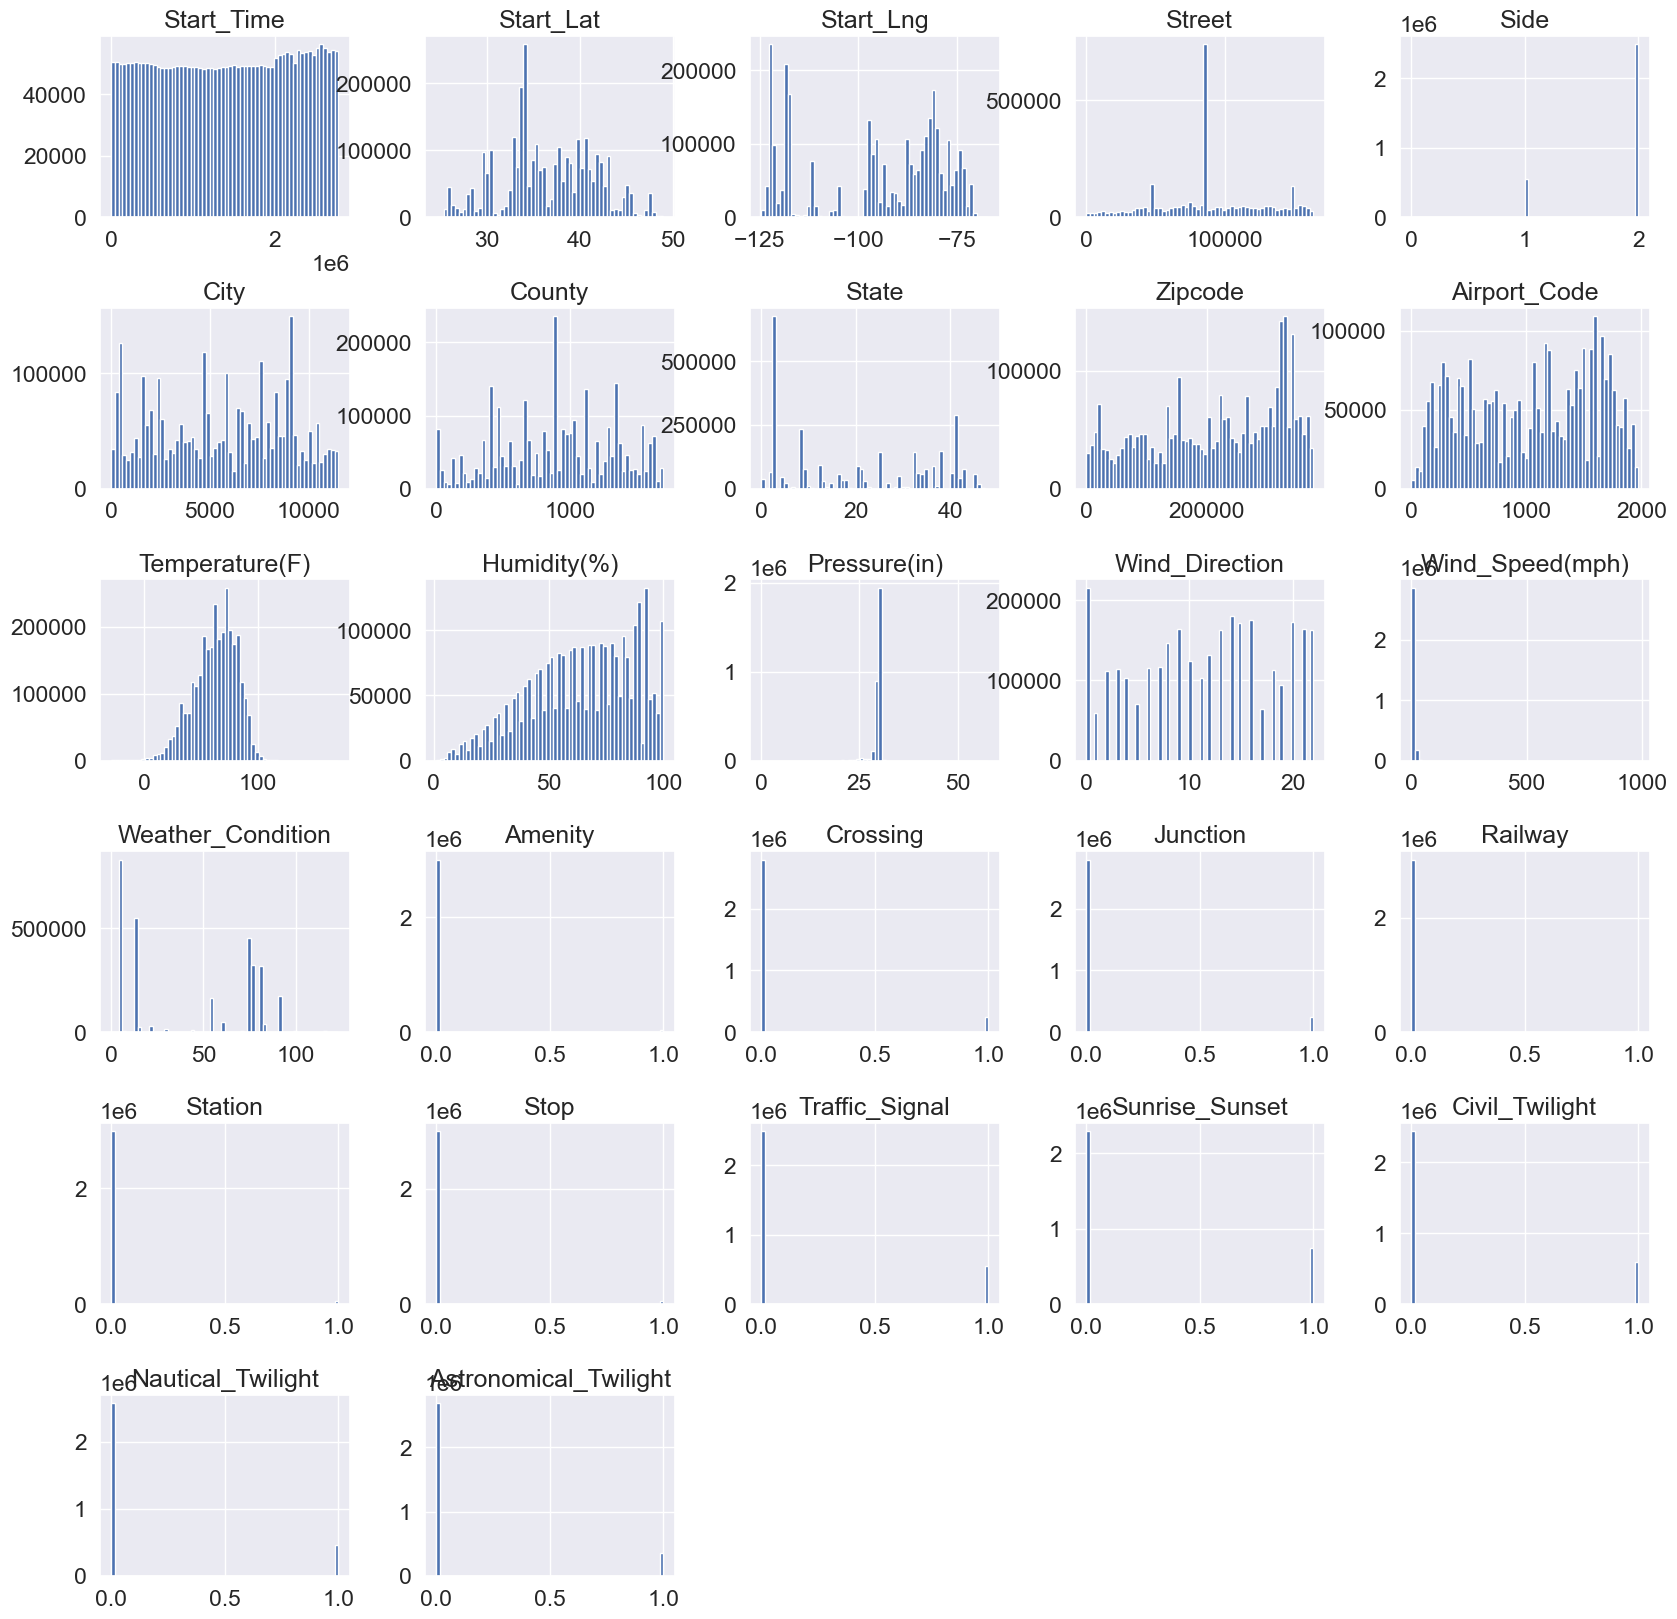

In [36]:
df.hist(bins=60, figsize=(20, 20))
plt.subplots_adjust(hspace=0.5) 
plt.show()  

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

In [38]:
# Feature Scaling - Standardisation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
X_train

array([[-0.65391308, -1.25063718, -0.12551548, ..., -0.49616353,
        -0.42021079, -0.36019377],
       [-1.27261042, -1.45692971, -0.1641722 , ...,  2.01546453,
        -0.42021079, -0.36019377],
       [ 0.3147102 ,  0.19686925,  1.05547902, ..., -0.49616353,
        -0.42021079, -0.36019377],
       ...,
       [-0.27301706, -0.76018499, -0.07315546, ..., -0.49616353,
        -0.42021079, -0.36019377],
       [ 0.52480562, -1.24705882, -0.12503462, ..., -0.49616353,
        -0.42021079, -0.36019377],
       [ 0.53794014, -0.51189322, -1.32273064, ..., -0.49616353,
        -0.42021079, -0.36019377]])

In [40]:
X_test

array([[ 1.4117567 ,  0.94107272, -0.02507316, ...,  2.01546453,
         2.37975803,  2.77628343],
       [-1.12019765, -0.54417324, -1.3145577 , ..., -0.49616353,
        -0.42021079, -0.36019377],
       [-0.13145809,  0.47969632, -0.53016651, ..., -0.49616353,
        -0.42021079, -0.36019377],
       ...,
       [ 0.76032129, -0.53696013,  0.66079141, ..., -0.49616353,
        -0.42021079, -0.36019377],
       [-1.25564464,  0.64928419,  0.6632243 , ..., -0.49616353,
        -0.42021079, -0.36019377],
       [-1.21911114,  0.30362743,  1.01144596, ..., -0.49616353,
        -0.42021079, -0.36019377]])

In [61]:
lr = LogisticRegression()  
lr.fit(X_train, Y_train)

lr_train_score = lr.score(X_train, Y_train)
lr_test_score = lr.score(X_test, Y_test)

Y_pred = lr.predict(X_test)

In [62]:
lr_class = classification_report(Y_test, Y_pred)
print(lr_class)

              precision    recall  f1-score   support

           1       0.79      0.06      0.12      5784
           2       0.70      0.94      0.81    412458
           3       0.49      0.15      0.23    169609
           4       0.53      0.01      0.01     18853

    accuracy                           0.68    606704
   macro avg       0.63      0.29      0.29    606704
weighted avg       0.64      0.68      0.61    606704



In [43]:
lr_cf = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix \n')
print(lr_cf)

Confusion Matrix 

[[   375   5373     36      0]
 [    75 388986  23330     67]
 [    10 143897  25660     42]
 [    14  15557   3161    121]]


In [44]:
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc.fit(X_train, Y_train)

dtc_train_score = dtc.score(X_train, Y_train)
dtc_test_score = dtc.score(X_test, Y_test)

Y_pred = dtc.predict(X_test)

In [45]:
dtc_class = classification_report(Y_test, Y_pred)
print(dtc_class)

              precision    recall  f1-score   support

           1       0.58      0.61      0.60      5784
           2       0.87      0.87      0.87    412458
           3       0.70      0.70      0.70    169609
           4       0.44      0.47      0.45     18853

    accuracy                           0.80    606704
   macro avg       0.65      0.66      0.65    606704
weighted avg       0.81      0.80      0.81    606704



In [46]:
dtc_cf = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix \n')
print(dtc_cf)

Confusion Matrix 

[[  3542   1641    459    142]
 [  1916 357305  46721   6516]
 [   528  45781 118742   4558]
 [   131   5761   4184   8777]]


In [47]:
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(X_train, Y_train)

rfc_train_score = rfc.score(X_train, Y_train)
rfc_test_score = rfc.score(X_test, Y_test)

Y_pred = rfc.predict(X_test)

In [48]:
rfc_class = classification_report(Y_test, Y_pred)
print(rfc_class)

              precision    recall  f1-score   support

           1       0.71      0.61      0.66      5784
           2       0.87      0.91      0.89    412458
           3       0.76      0.71      0.74    169609
           4       0.75      0.42      0.54     18853

    accuracy                           0.84    606704
   macro avg       0.77      0.66      0.71    606704
weighted avg       0.83      0.84      0.83    606704



In [49]:
rfc_cf = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix \n')
print(rfc_cf)

Confusion Matrix 

[[  3538   1850    365     31]
 [  1071 376798  33093   1496]
 [   293  47788 120400   1128]
 [    86   6717   4073   7977]]


In [50]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

gnb_train_score = gnb.score(X_train, Y_train)
gnb_test_score = gnb.score(X_test, Y_test)

Y_pred = gnb.predict(X_test)

In [51]:
gnb_class = classification_report(Y_test, Y_pred)
print(gnb_class)

              precision    recall  f1-score   support

           1       0.10      0.38      0.16      5784
           2       0.88      0.37      0.52    412458
           3       0.38      0.88      0.53    169609
           4       0.11      0.10      0.10     18853

    accuracy                           0.50    606704
   macro avg       0.37      0.43      0.33    606704
weighted avg       0.71      0.50      0.51    606704



In [52]:
gnb_cf = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix \n')
print(gnb_cf)

Confusion Matrix 

[[  2173   1098   2446     67]
 [ 15640 152841 231053  12924]
 [  3595  15142 148706   2166]
 [   657   4181  12219   1796]]


In [53]:
df_sample = df_copy.sample(frac=0.035)
y = df_sample.pop('Severity')
x = df_sample

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

# Feature Scaling - Standardisation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [55]:
np.random.seed(368)

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100]
min_samples_leaves = [1, 5, 8]
min_samples_splits = [2, 3, 5]
max_depths = (2, 3, 4)
bootstraps = (True, False)
max_features = ('sqrt', 'log2', None)
criterias = ('gini', 'entropy')

parameters = {
    'max_depth': max_depths,
    'bootstrap': bootstraps,
    'max_features': max_features,
    'criterion': criterias,
    'min_samples_split': min_samples_splits,
    'min_samples_leaf': min_samples_leaves
}

rfc = RandomForestClassifier(random_state=581)

rfc_gs = GridSearchCV(rfc, parameters, cv=3, n_jobs=-1)

rfc_gs_data = rfc_gs.fit(x_train, y_train)

print('Best params with GridSearchCV\n', rfc_gs_data.best_params_)
print('Best score with GridSearchCV\n', rfc_gs_data.best_score_)

rfc = rfc_gs.best_estimator_

rfc.fit(x_train, y_train)

Best params with GridSearchCV
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score with GridSearchCV
 0.713131955981335


RandomForestClassifier(bootstrap=False, max_depth=4, max_features=None,
                       random_state=581)

In [56]:
rs = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions = parameters, n_iter = 150, verbose = 1, n_jobs=-1)
rs_data = rs.fit(x_train, y_train)

print('Best params with RandomizedSearchCV\n', rs_data.best_params_)
print('Best Score using RandomizedSearchCV\n' , rs_data.best_score_*100)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best params with RandomizedSearchCV
 {'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 4, 'criterion': 'gini', 'bootstrap': False}
Best Score using RandomizedSearchCV
 71.3190781399075


In [63]:
d = {
    "Logistic Regression": [lr_train_score, lr_test_score],
    "Decision Tree": [dtc_train_score, dtc_test_score],
    "Random Forest": [rfc_train_score, rfc_test_score],
    "NaiveBayes": [gnb_train_score, gnb_test_score]
}
modeldf = pd.DataFrame(d)
modeldf.index = ["Train Accuracy", "Test Accuracy"]
modeldf

,Logistic Regression,Decision Tree,Random Forest,NaiveBayes
Train Accuracy,0.683788,0.999867,0.989845,0.502815
Test Accuracy,0.684258,0.804949,0.838486,0.503567


In [ ]:
Random forest shows highest accuracy. So it is best. see test accuracy